In [25]:
#import necessary packages
import numpy as np
import math as m
import matplotlib.pyplot as plt
from scipy.stats import norm
from pandas_datareader import data

In [26]:
apple = data.DataReader('AAPL', 'yahoo',start='1/1/2010')

In [52]:
days = (apple.index[-1] - apple.index[0]).days # gives how many days from 2010/01/01, cannot use len(df) since someday do not trading.
CAGR = (((apple['Adj Close'][-1])/(apple['Adj Close'][0]))**(365/days)) -1
print('CAGR=', str(round(CAGR,4)*100) + "%")
mu = CAGR

CAGR= 24.15%


CAGR = ((EB/BB)** (1/n)) - 1 
#compound annual growth rate; 
#EB: ending balance; 
#BB: beginning balance; 
#n: number of years

In [54]:
apple['Return'] = apple['Adj Close'].pct_change() # (current value - previous value )/current value
apple.head()

,High,Low,Open,Close,Volume,Adj Close,Return
Date,,,,,,,
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,26.538483,NaN
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,26.584366,0.001729
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,26.161509,-0.015906
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,26.113146,-0.001849
2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,26.286753,0.006648


In [70]:
vol = apple['Return'].std() * math.sqrt(252) 
#volidality = standard deviation * squre root of days 
#standard deviation is the squared roof of variance, in order to keep consistent, we also squre root of days proportionally.
#252 stands for the total trading days for one year.
print('Annual Voladility =', str(round(vol*100,2)) + "%")

Annual Voladility = 27.28%


In [72]:
#define variables
S = apple['Adj Close'][-1] #the last avaialbe stock price
T = 252
mu = 0.2415
vol = 0.2728

In [76]:
np.random.normal((mu/T),vol/math.sqrt(T),T) + 1

array([1.0073362 , 1.00535088, 0.99753296, 1.01351055, 0.99623817,
       1.0043093 , 0.98083172, 0.98694236, 1.00155332, 1.00505714,
       1.01999416, 0.9944727 , 1.01663392, 0.99481439, 0.98354474,
       0.9985832 , 0.95877318, 0.99771763, 1.01121374, 1.00684318,
       1.02839544, 1.00163047, 1.00954432, 1.02994638, 1.00817844,
       0.99266826, 1.01188496, 1.00552912, 0.99778027, 1.02734261,
       1.02449755, 1.01047567, 0.9964721 , 1.00824169, 0.97965935,
       1.01653836, 1.01705982, 1.00380101, 1.03138966, 0.98694956,
       1.00799703, 0.98388485, 1.01552311, 1.01537119, 0.99982284,
       1.00361615, 0.98130797, 0.98435531, 0.97626079, 0.9950936 ,
       1.02562553, 0.98095035, 0.99603076, 1.00183705, 1.02365259,
       1.00858851, 0.98847014, 1.00746395, 0.9990913 , 1.04274916,
       1.02185315, 1.00711108, 0.97427752, 0.999428  , 0.98558232,
       1.00568634, 0.99892371, 0.98592957, 1.01231902, 1.02349219,
       0.97591925, 0.97789144, 0.98873876, 1.01838127, 1.03839

In [82]:
#create list of daily returns using random normal distribution
daily_returns=np.random.normal((mu/T),vol/math.sqrt(T),T)+1
daily_returns[:3]

array([0.97884882, 1.02962035, 0.98893152])

In [85]:
price_list = [S]

for x in daily_returns:
    price_list.append(price_list[-1]*x)

#print(price_list)

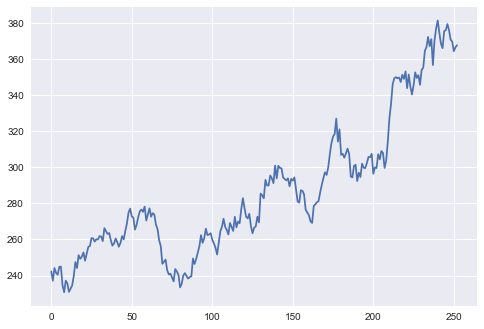

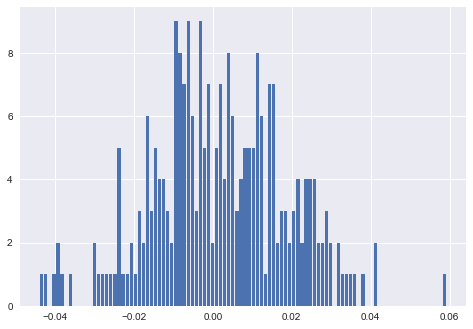

In [95]:
plt.style.use('seaborn')
plt.plot(price_list)
plt.show()
plt.hist(daily_returns-1,bins=100,rwidth=0.8)
plt.show()

above chart shows one time simulation, but we need to run hundreds or thouthouds of time in real world.

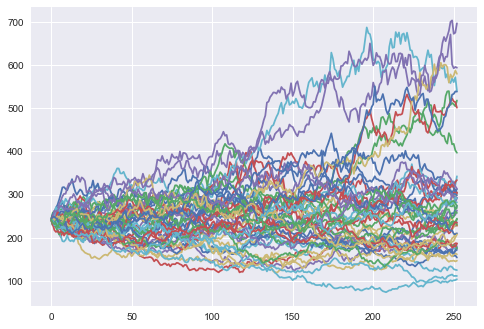

In [103]:
#choose number of runs to simulate - I have chosen 1000
for i in range(50):
    #create list of daily returns using random normal distribution
    daily_returns=np.random.normal(mu/T,vol/math.sqrt(T),T)+1
    
    #set starting price and create price series generated by above random daily returns
    price_list = [S]
    
    for x in daily_returns:
        price_list.append(price_list[-1]*x)

    #plot data from each individual run which we will plot at the end
    plt.plot(price_list)

#show the plot of multiple price series created above
plt.show()

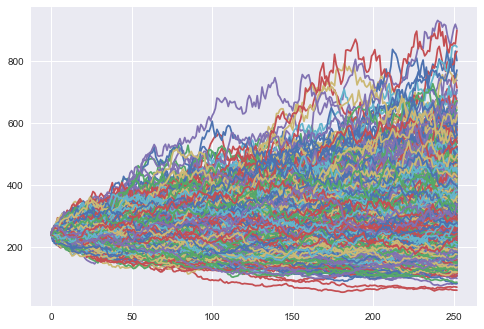

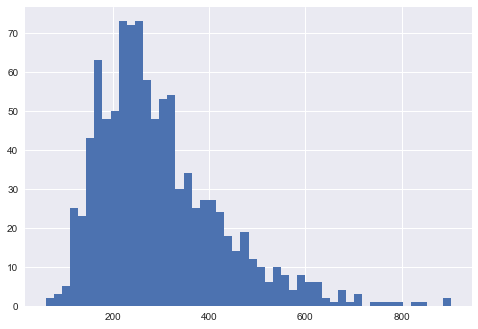

In [118]:
#set up empty list to hold our ending values for each simulated price series
result = []

#Define Variables
S = apple['Adj Close'][-1] #starting stock price (i.e. last available real stock price)
T = 252 #Number of trading days
mu = 0.2309 #Return
vol = 0.4259 #Volatility

#choose number of runs to simulate - I have chosen 10,000
for i in range(1000):
    #create list of daily returns using random normal distribution
    daily_returns=np.random.normal(mu/T,vol/math.sqrt(T),T)+1
    
    #set starting price and create price series generated by above random daily returns
    price_list = [S]
    
    for x in daily_returns:
        price_list.append(price_list[-1]*x)

    #plot data from each individual run which we will plot at the end
    plt.plot(price_list)
    
    #append the ending value of each simulated run to the empty list we created at the beginning
    result.append(price_list[-1])

#show the plot of multiple price series created above
plt.show()

#create histogram of ending stock values for our mutliple simulations
plt.hist(result,bins=50)
plt.show()

In [109]:
len(result)

100

In [117]:
print('Mean = ',round(np.mean(result),2))

Mean =  334.7


In [115]:
print('5% percentile = ',np.percentile(result,5))

5% percentile =  149.90966976896595


In [116]:
print('95% percentile = ',np.percentile(result,95))

95% percentile =  641.4043690428712


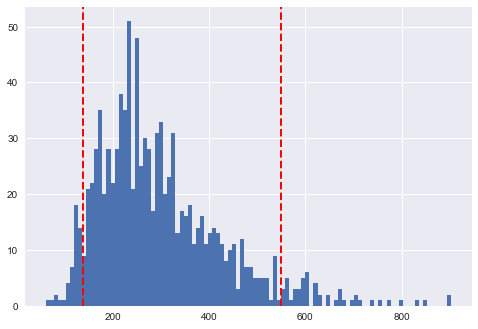

In [119]:
plt.hist(result,bins=100)
plt.axvline(np.percentile(result,5), color='r', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(result,95), color='r', linestyle='dashed', linewidth=2)
plt.show()